In [1]:
import meshio

import pyvista




C:\Users\AlexP\AppData\Roaming\Python\Python312\site-packages\pyvista\jupyter\notebook.py:34: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


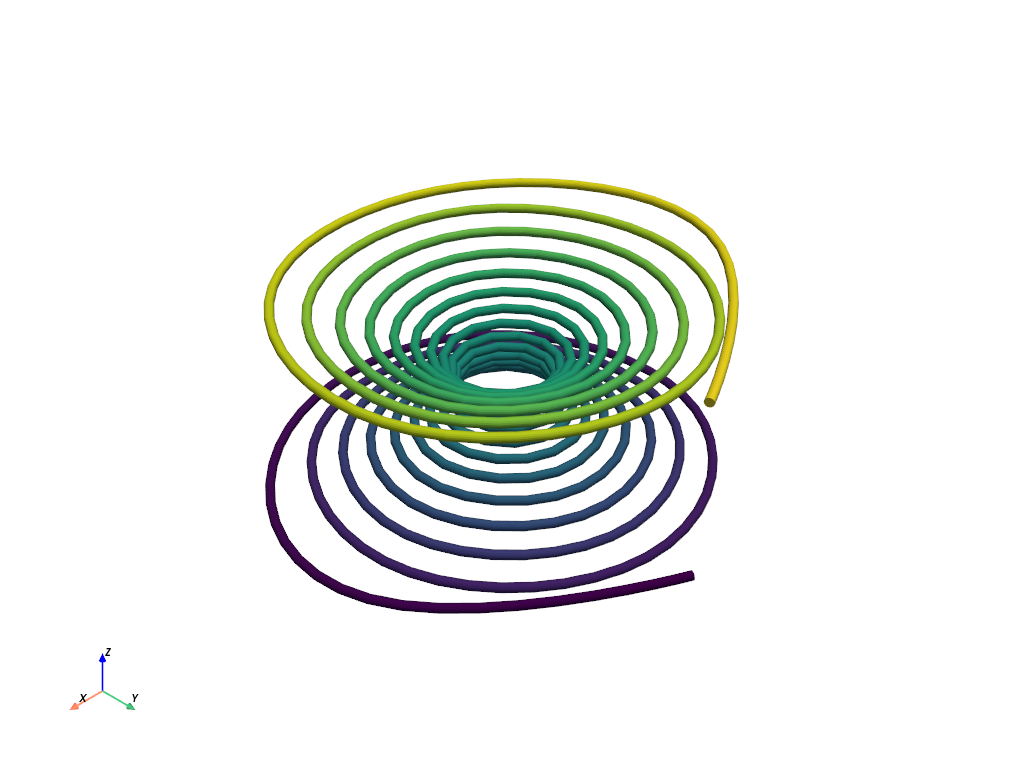

In [37]:
import numpy as np
import pyvista

# Make the xyz points
theta = np.linspace(-20 * np.pi, 20 * np.pi, 100)
z = np.linspace(-2, 2, 100)
r = z**2 + 1
x = r * np.sin(theta)
y = r * np.cos(theta)
points = np.column_stack((x, y, z))

spline = pyvista.Spline(points, 500).tube(radius=0.1)
spline.plot(scalars='arc_length', show_scalar_bar=False
            )

C:\Users\AlexP\AppData\Roaming\Python\Python312\site-packages\pyvista\jupyter\notebook.py:34: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


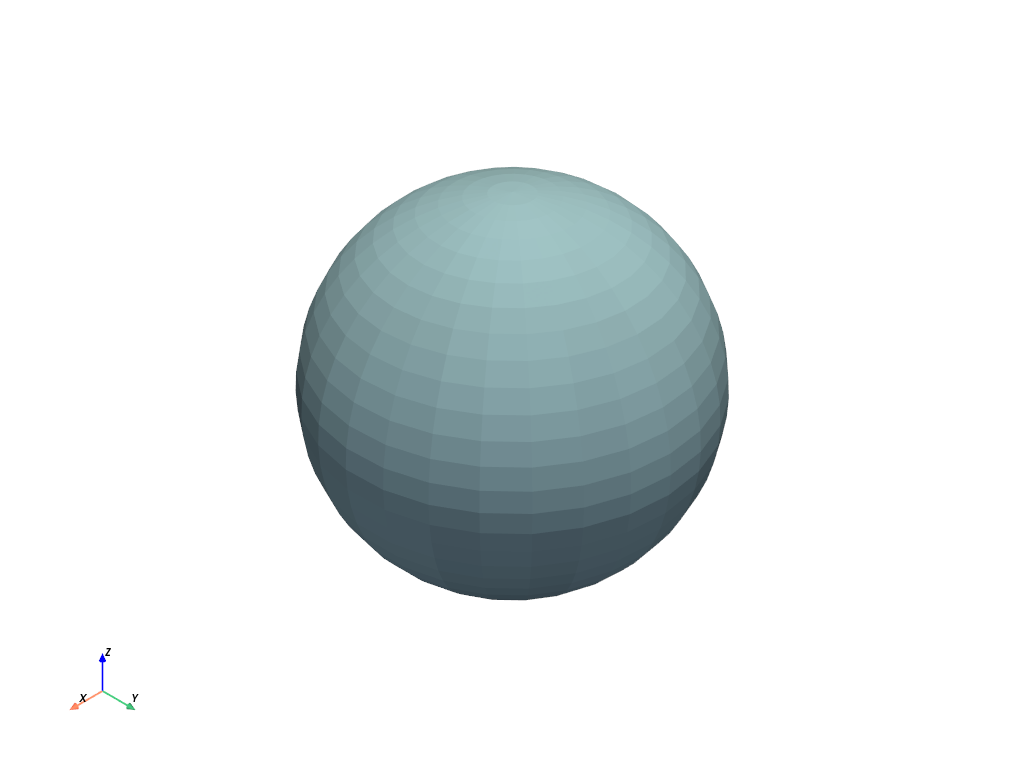

In [26]:


Sphere = pyvista.SolidSphere()

Sphere.plot(show_scalar_bar=True)


#Sphere.plot(scalars='arc_length', show_scalar_bar=False)





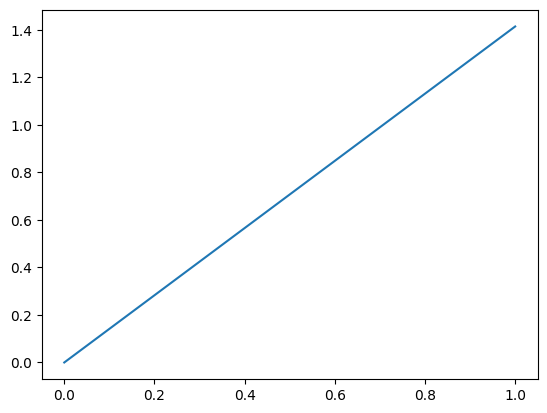

In [56]:
import matplotlib.pyplot as plt

import numpy as np






x = np.linspace(0, 1,10)

y = np.linspace(0, 1,10)

r = np.sqrt(x**2+y**2)

plt.plot(x,r)





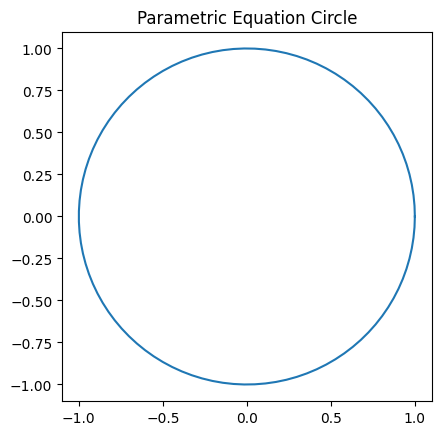

In [64]:
r =  1

phi = np.linspace(0, 2*np.pi, 100)

x = r*np.cos(phi)
y = r*np.sin(phi)


figure, axes = plt.subplots( 1 )
 
axes.plot( x,y)
axes.set_aspect( 1 )
 
plt.title( 'Parametric Equation Circle' )
plt.show()



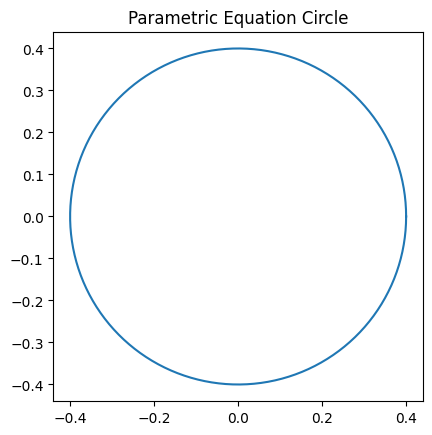

In [66]:
import numpy as np
import matplotlib.pyplot as plt
 
theta = np.linspace( 0 , 2 * np.pi , 150 )
 
radius = 0.4
 
a = radius * np.cos( theta )
b = radius * np.sin( theta )
 
figure, axes = plt.subplots( 1 )
 
axes.plot( a, b )
axes.set_aspect( 1 )
 
plt.title( 'Parametric Equation Circle' )
plt.show()

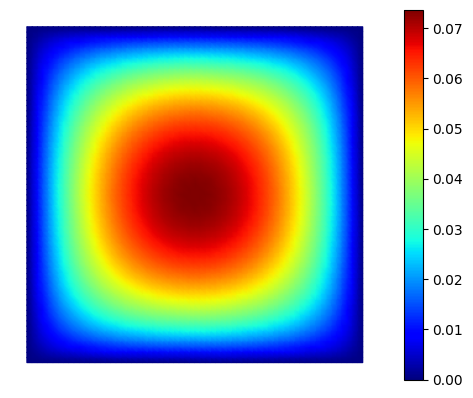

In [68]:
from skfem import *
from skfem.helpers import dot, grad

# create the mesh
m = MeshTri().refined(6)
# or, with your own points and cells:
# m = MeshTri(points, cells)

e = ElementTriP1()
basis = Basis(m, e)

# this method could also be imported from skfem.models.laplace
@BilinearForm
def laplace(u, v, _):
    return dot(grad(u), grad(v))


# this method could also be imported from skfem.models.unit_load
@LinearForm
def rhs(v, _):
    return 1.0 * v

A = asm(laplace, basis)
b = asm(rhs, basis)
# or:
# A = laplace.assemble(basis)
# b = rhs.assemble(basis)

# enforce Dirichlet boundary conditions
A, b = enforce(A, b, D=m.boundary_nodes())

# solve -- can be anything that takes a sparse matrix and a right-hand side
x = solve(A, b)

def visualize():
    from skfem.visuals.matplotlib import plot
    return plot(m, x, shading='gouraud', colorbar=True)

if __name__ == "__main__":
    visualize().show()

In [2]:
import meshio

# two triangles and one quad
points = [
    [0.0, 0.0],
    [1.0, 0.0],
    [0.0, 1.0],
    [1.0, 1.0],
    [2.0, 0.0],
    [2.0, 1.0],
]
cells = [
    ("triangle", [[0, 1, 2], [1, 3, 2]]),
    ("quad", [[1, 4, 5, 3]]),
]

mesh = meshio.Mesh(
    points,
    cells,
    # Optionally provide extra data on points, cells, etc.
    point_data={"T": [0.3, -1.2, 0.5, 0.7, 0.0, -3.0]},
    # Each item in cell data must match the cells array
    cell_data={"a": [[0.1, 0.2], [0.4]]},
)
mesh.write(
    "foo.vtk",  # str, os.PathLike, or buffer/open file
    # file_format="vtk",  # optional if first argument is a path; inferred from extension
)

# Alternative with the same options
meshio.write_points_cells("foo.vtk", points, cells)

Warning: VTK requires 3D points, but 2D points given. Appending 0 third component.

Warning: VTK requires 3D points, but 2D points given. Appending 0 third component.

L2 error: 0.0006921199060456357


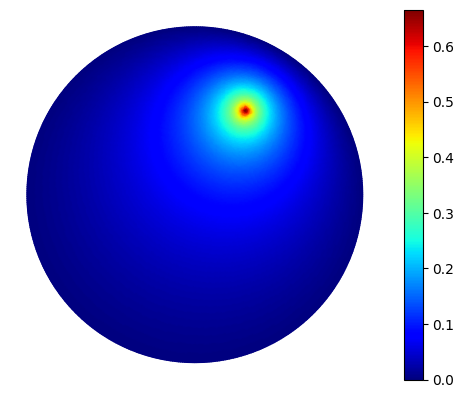

In [4]:



from functools import partial
from pathlib import Path

from skfem import *
from skfem.models.poisson import laplace, mass, unit_load
from skfem.io.json import from_file

import numpy as np


def greens(a: float, s: np.ndarray, x: np.ndarray) -> np.ndarray:
    """Return the Green's function for a disk of radius `a`

    with source at point `s`, evaluated at points `x`.
    """

    snorm = np.linalg.norm(s)
    sfull = s[:, None, None]
    numerator = np.linalg.norm(snorm ** 2 * x - a ** 2 * sfull, axis=0)
    denominator = a * snorm * np.linalg.norm(x - sfull, axis=0)
    return np.log(numerator / denominator) / 2 / np.pi


basis = Basis(MeshTri.init_circle(5), ElementTriP2())
source = np.array([0.3, 0.5])

A = asm(laplace, basis)
b = basis.point_source(source)

x = solve(*condense(A, b, D=basis.get_dofs()))

a = np.linalg.norm(basis.mesh.p, axis=0).max()
exact = basis.project(lambda x: greens(a, source, x))
error = x - exact
l2error = np.sqrt(error @ mass.assemble(basis) @ error)

def visualize():
    from skfem.visuals.matplotlib import plot
    return plot(basis,
                x,
                shading='gouraud',
                nrefs=2,
                colorbar=True)

if __name__ == "__main__":
    print("L2 error:", l2error)
    visualize().show()

In [28]:
import numpy as np
import matplotlib.pyplot as plt 



 
Fx3 = - 500
Fy4 = - 1000
ux_1 = 2
ux_2 = 4

l=1
A = 150 
E = 210000

Knot1 = (0,0)

Knot2 = (l,0)


Knot3 = (3/2*l,np.tan(45)*l/2)

Knot4 = (l/2,np.tan(45)*l/2)


Element1 = (Knot1, Knot2)
Element2 = (Knot2, Knot3)
Element3 = (Knot3, Knot4)
Element4 = (Knot4, Knot2)
Element5 = (Knot4, Knot1)





def Kraft(ux_1,ux_2):
    Fx1 = E*A/l*(ux_1-ux_2)
    Fx2 = E*A/l*(ux_2-ux_1)
    F = np.array([Fx1,Fx2])
    return print(F)

Kraft(1,2)









[-31500000.  31500000.]


In [30]:
import numpy as np

# Funktion zur Berechnung der Elementsteifigkeitsmatrix
def element_stiffness_matrix(l, A, E):
    k = (A * E) / l
    return np.array([[k, -k],
                     [-k, k]])

# Funktion zur Berechnung der Gesamtelementsteifigkeitsmatrix
# Funktion zur Berechnung der Gesamtelementsteifigkeitsmatrix
def assemble_global_stiffness_matrix(elements):
    num_nodes = len(set([tuple(node) for element in elements for node in element]))
    K_global = np.zeros((num_nodes, num_nodes))
    
    for element in elements:
        node1, node2 = element
        x1, y1 = node1
        x2, y2 = node2
        length = np.sqrt((x2 - x1)**2 + (y2 - y1)**2)
        element_matrix = element_stiffness_matrix(length, A, E)
        
        # Assemblierung der lokalen Steifigkeitsmatrix in die globale Steifigkeitsmatrix
        indices = [list(element).index(node1), list(element).index(node2)]
        for i, idx1 in enumerate(indices):
            for j, idx2 in enumerate(indices):
                K_global[idx1, idx2] += element_matrix[i, j]
                
    return K_global


# Definition der Knoten und Elemente
Knot1 = np.array([0, 0])
Knot2 = np.array([1, 0])
Knot3 = np.array([1.5, np.tan(np.deg2rad(45)) * 0.5])
Knot4 = np.array([0.5, np.tan(np.deg2rad(45)) * 0.5])

Element1 = (Knot1, Knot2)
Element2 = (Knot2, Knot3)
Element3 = (Knot3, Knot4)
Element4 = (Knot4, Knot2)
Element5 = (Knot4, Knot1)

# Definition der gegebenen Parameter
A = 150 
E = 210000

# Assemblierung der Gesamtelementsteifigkeitsmatrix
elements = [Element1, Element2, Element3, Element4, Element5]
K_global = assemble_global_stiffness_matrix(elements)

# Angewendete Kräfte
F = np.array([0, 0, 0, -500, 0, -1000])

# Bekannte Knotenkräfte (Dirichlet-Randbedingungen)
known_forces = [0, 1, 2]

# Lösen des Gleichungssystems
unknown_forces = np.delete(F, known_forces)
K_unknown = np.delete(np.delete(K_global, known_forces, axis=0), known_forces, axis=1)
displacements = np.linalg.solve(K_unknown, unknown_forces)

# Einsetzen der berechneten Verschiebungen in die vollständigen Knotenkräfte
all_forces = np.zeros_like(F)
for i, idx in enumerate(range(len(all_forces))):
    if idx not in known_forces:
        all_forces[idx] = displacements[i]
    else:
        all_forces[idx] = F[idx]

print("Gesamtelementsteifigkeitsmatrix:")
print(K_global)
print("\nKnotenkräfte:")
print(all_forces)


ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()